# Домашнее задание 3.

`Keras` и сверточные нейронные сети.

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


Using TensorFlow backend.


In [0]:
def reset_tf_session():
    curr_session = tf.get_default_session()
    if curr_session is not None:
        curr_session.close()
    K.clear_session()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

## Задание 1 — инициализация весов CNN (3 балла).

В этом задании нужно будет исследовать, как выбор функции инициализации весов влияет на обучение CNN.


Продолжим работать с датасетом CIFAR-10.

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

# нормализуем входные данные
x_train = x_train / 255 - 0.5
x_test = x_test / 255 - 0.5

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 4s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model

Определим функцию `fit_model` с архитектурой архитектура CNN.

Метод `model.fit` возвращает объект класса `keras.callbacks.History()` — это колбэк, который автоматически применяется ко всем моделям и логирует много чего полезного. В частности логируются значения функции потерь на каждой итерации.

**Задание 1.1** (0.5 балла) Добавьте в архитектуру модели инициализацию весов для тех слоев, где она необходима.


In [0]:
def fit_model(initializer='glorot_normal'):
    s = reset_tf_session()  
    INIT_LR = 5e-3
    BATCH_SIZE = 32
    EPOCHS = 10
   
    def lr_scheduler(epoch):
        return INIT_LR * 0.9 ** epoch  

    ### YOUR CODE HERE 
    # kernel_initializer=initializer для тех слоев, которым нужна инициализация весов
    model = Sequential()
    model.add(Conv2D(filters=16, padding='same', kernel_size=(3,3), kernel_initializer=initializer , input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_initializer=initializer ,kernel_size=(3,3)))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(40, kernel_initializer=initializer))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))    
    model.add(Dense(10, kernel_initializer=initializer))
    model.add(Activation("softmax"))


    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.adamax(lr=INIT_LR),
        metrics=['accuracy']
    )
  
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],                   
        shuffle=True,
        verbose=0,
        initial_epoch=0    
    )

    # Возвращаем объект класса keras.callbacks.History
    return history

**Задание 1.2** (1.5 балла). Обучите модель с разными [функциями инициализации](https://keras.io/initializers/) весов:
* `Zeros` — веса инициализируются нулями
* `Constant=0.05` — веса инициализируются константой 0.05
* `RandomUniform` — веса генерируются равномерно из отрезка [-0.05, 0.05]
* `glorot_normal` — Xavier initializer из лекций
* `lecun_uniform`

Добавьте в список `losses` значения функции потерь для каждой функции инициализации, их можно достать из `History`



In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

def fit_model(initializer):
    s = reset_tf_session()  
    INIT_LR = 5e-3
    BATCH_SIZE = 32
    EPOCHS = 10
   
    def lr_scheduler(epoch):
        return INIT_LR * 0.9 ** epoch  

    ### YOUR CODE HERE 
    # kernel_initializer=initializer для тех слоев, которым нужна инициализация весов
    model = Sequential()
    model.add(Conv2D(filters=16, padding='same', kernel_size=(3,3), kernel_initializer=initializer , input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_initializer=initializer ,kernel_size=(3,3)))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(40, kernel_initializer=initializer))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))    
    model.add(Dense(10, kernel_initializer=initializer))
    model.add(Activation("softmax"))


    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.adamax(lr=INIT_LR),
        metrics=['accuracy']
    )
  
    history = LossHistory()
    model.fit(x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[history],                   
        shuffle=True,
        verbose=0,
        initial_epoch=0    
    )

    # Возвращаем объект класса keras.callbacks.History
    return history

In [7]:
zeros_weights = fit_model(keras.initializers.Zeros())
constant_weigths = fit_model(keras.initializers.Constant(value=0.05))
uniform_weights = fit_model(keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None))
glorot_weights = fit_model(keras.initializers.glorot_normal(seed=None))
lecun_weigths = fit_model(keras.initializers.lecun_uniform(seed=None))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [0]:
losses = []

### YOUR CODE HERE 
losses.append(zeros_weights.losses)
losses.append(constant_weigths.losses)
losses.append(uniform_weights.losses)
losses.append(glorot_weights.losses)
losses.append(lecun_weigths.losses)

**Задание 1.3** (1 балла). Постройте графики зависимости функций потерь от номера итерации, подпишите их. Прокомментируйте результат.

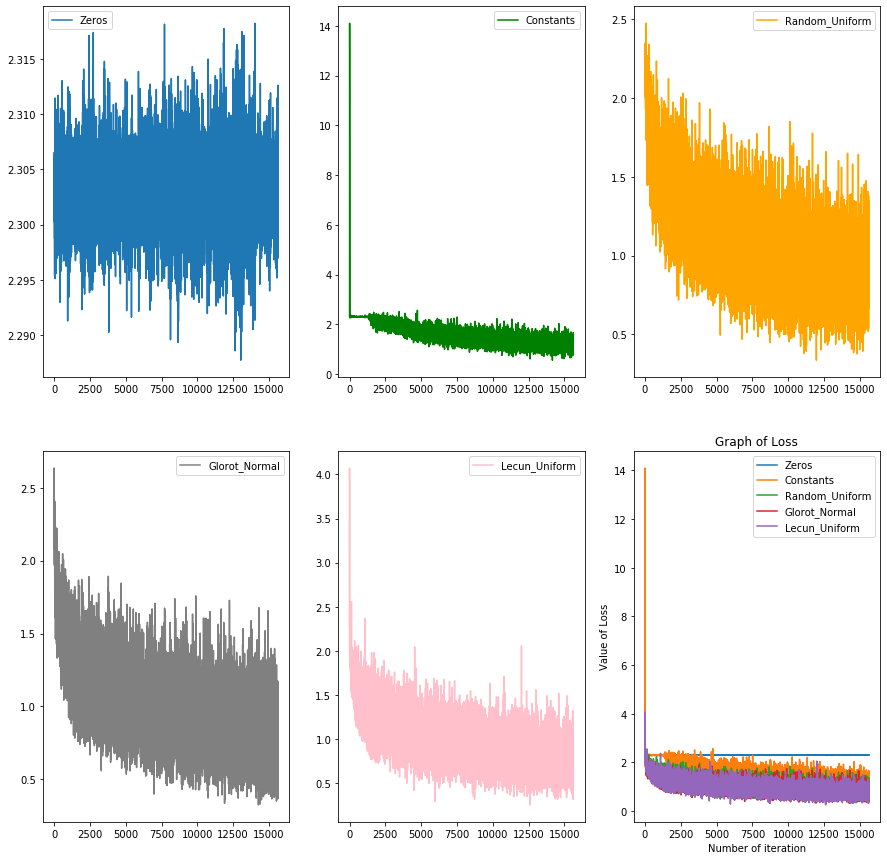

In [11]:
### YOUR CODE HERE 
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)


ax.plot(range(len(losses[0])), losses[0], label='Zeros')
ax.legend(loc='best')
ax2.plot(range(len(losses[0])), losses[1],'green',label='Constants')
ax2.legend(loc='best')
ax3.plot(range(len(losses[0])), losses[2], 'orange', label='Random_Uniform')
ax3.legend(loc='best')
ax4.plot(range(len(losses[0])), losses[3], 'grey', label='Glorot_Normal')
ax4.legend(loc='best')
ax5.plot(range(len(losses[0])), losses[4], 'pink', label='Lecun_Uniform')
ax5.legend(loc='best')
ax6.plot(range(len(losses[0])), losses[0], label='Zeros')
ax6.plot(range(len(losses[0])), losses[1], label='Constants')
ax6.plot(range(len(losses[0])), losses[2], label='Random_Uniform')
ax6.plot(range(len(losses[0])), losses[3], label='Glorot_Normal')
ax6.plot(range(len(losses[0])), losses[4], label='Lecun_Uniform')
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss')
plt.title('Graph of Loss')
plt.legend(loc='best')
plt.show()



По полученным графикам видно, что если занулить веса, то ошибка всегда будет колебаться около 2, то есть данный способ инизиализации весов крайне не продуктивен. Если же инициализировать веса как константы, то это будет в разы лучше чем нулевые веса, но при этом видно, что скорость сходимость все же мала. Относительно трех оставшихся способон инициализации тяжело что-то выделить, т.к. имеющиеся отличия крайне незначительны, они достигают приблизительно одинакового минимума с небольшими отличиями на первых итерациях: у спопсоба инициализации Lecun_Uniform в начальный момент довольно высокая ошибка, но она быстро уменьшается, а оставшиеся два Glorot_Normal и Random_Uniform сильно схожи.


## Задание 2 — CNN для CIFAR-10 с сохранением весов модели (7 баллов)

В этом задании мы модифицируем нейросеть с семинара, чтобы она достигала большего значения `accuracy` и научимся сохранять веса модели в файл во время обучения. Можно использовать только те же слои, которые использовались на семинаре: `Conv2D, MaxPooling2D,  LeakyReLU, Dropout, Flatten, Dense`.

**Задание 2.1** (4 балла). Подберите архитектуру модели так, чтобы значение `accuracy` на тестовой выборке было не менее 85.

In [0]:
def make_model():    

    ### YOUR CODE HERE
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1)) 
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.3))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform',  input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='he_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))    
    model.add(Dense(10, kernel_initializer='he_uniform'))
    model.add(Activation("softmax"))
    

    
    return model    

In [13]:
s = reset_tf_session()
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

**Задание 2.2** (2 балла). Реализуйте колбэк, который сохраняет модель в `.hdf5` файл и печатает имя файла, в который была сохранена модель. Используйте функцию `model_save`. Строка с именем файла имеет вид `<name>_{0:02d}.hdf5`, отформатируйте ее так, чтобы в имени строки фигурировал номер эпохи.

In [0]:
from keras.models import save_model, load_model

class ModelSaveCallback(keras.callbacks.Callback):

    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        ### YOUR CODE HERE
        self.epoch = epoch
        save_model(model, self.file_name.format(self.epoch + 1))
        print("Epoch:", self.epoch + 1)
        print('Model saved in ' + self.file_name.format(self.epoch + 1))

**Задание 2.3** (1 балл). Реализуйте функцию, которая с помощью `load_model` будет загружать модель из файла.

In [0]:
def load_from_file(model_filename, last_epoch):
  ### YOUR CODE HERE
  return load_model(model_filename.format(last_epoch))


In [18]:
INIT_LR = 5e-3
BATCH_SIZE = 32
EPOCHS = 20

model_filename = 'weights_{0:02d}.hdf5'

s = reset_tf_session()

#model = make_model()
model = load_from_file(model_filename, 20)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9),
    metrics=['accuracy']
)

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch 

# в случае, если обучение было прервано, можно загрузить модель из файла, 
# соответствующего последней эпохе, за которую есть сохраненные веса
# model = load_from_file(model_filename, 4)
  
history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               # не забудьте передать сюда ModelSaveCallback
               ModelSaveCallback(model_filename)
              ],
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1,
    initial_epoch=0    
)
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 678us/step - loss: 0.5310 - acc: 0.8159 - val_loss: 0.5412 - val_acc: 0.8212
Epoch: 1
Model saved in weights_01.hdf5
Epoch 2/20
50000/50000 [==============================] - 33s 651us/step - loss: 0.5103 - acc: 0.8218 - val_loss: 0.5172 - val_acc: 0.8280
Epoch: 2
Model saved in weights_02.hdf5
Epoch 3/20
50000/50000 [==============================] - 32s 646us/step - loss: 0.4865 - acc: 0.8304 - val_loss: 0.5115 - val_acc: 0.8290
Epoch: 3
Model saved in weights_03.hdf5
Epoch 4/20
50000/50000 [==============================] - 32s 642us/step - loss: 0.4633 - acc: 0.8375 - val_loss: 0.5021 - val_acc: 0.8327
Epoch: 4
Model saved in weights_04.hdf5
Epoch 5/20
50000/50000 [==============================] - 32s 639us/step - loss: 0.4354 - acc: 0.8478 - val_loss: 0.5319 - val_acc: 0.8301
Epoch: 5
Model saved in weights_05.hdf5
Epoch 6/20
50000/50000 [==============================]

Для повышения качества предсказаний я использовал метод увеличения значения Dropout, что приводит в росту точности рпедсказаний, но при этом не получается добится указанной точности, также заменил оптимизатор на SGD with momentum, при нем выходило лучше всего, что и видно если прогнать модель два раз с прошлой двацатой эпохи, то предсказание будет стабильно выдовать val_acc>=0.85
